# Implementing a Neural Network

In this exercise we will develop a neural network with two fully-connected layers to perform classification, and test it out on the MNIST dataset of handwritten digits.

** Credits: ** We have based this exercise on an assignment (Assignment #1 of Winter 2016) of the very good course on Neural Networks from the Stanford University [http://cs231n.github.io/](http://cs231n.github.io/), but adjusted it a bit to use a smaller dataset (MNIST instead of CIFAR-10), and to work with Python 3.

** How to solve this exercise: ** You will have to work with both, the source file `cs231nHD/neural_net.py`, and this ipython notebook. This notebook allows you to verify your implementation of a neural net through predefined test cases. The source file `neural_net.py` contains a skeleton implementation with a lot of comments to show you what you are expected to do. Special blocks of **TODOs** indicate where you are supposed to add the implementation, and what to do there. The methods of the neural net you write in the separate file will be reloaded automatically whenever you save the `neural_net.py` file. The class `TwoLayerNet` is imported from this file as below.

In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

from cs231nHD.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

We will use the class `TwoLayerNet` in the file `cs231n/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

**Hint:** If you need more information on classes and object oriented programming, check out the great tutorial at [http://www.python-course.eu/python3_object_oriented_programming.php](http://www.python-course.eu/python3_object_oriented_programming.php)

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments!

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

## Forward pass: compute scores
Open the file `cs231n/neural_net.py` and look at the method `TwoLayerNet.loss`. This function takes the data and weights and should compute the class scores, the loss, and the gradients on the parameters.

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. Then run the cell below to see whether you have computed the right thing.

In [10]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209324e-08


## Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss. For the data loss, use the average cross-entropy softmax loss.

In [15]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss {} and correct loss {}:'.format(
        loss, correct_loss))
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss 1.3037878913298202 and correct loss 1.30378789133:
1.79856129989e-13


## Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [18]:
from cs231nHD.gradient_check import eval_numerical_gradient

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.5613181785044393e-09
W2 max relative error: 3.440707836450643e-09
b1 max relative error: 2.738421249546978e-09
b2 max relative error: 4.4476770163141686e-11


## Train the network
To train the network we will use stochastic gradient descent (SGD). Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

In [19]:
net = init_toy_model()

In [ ]:
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Applying the Network to a larger dataset

Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up the MNIST dataset from [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) so we can use it to train a classifier on a real dataset. The `load_mnist()` method downloads the data (~11MB) automatically if it is not present yet!

Each data point is now a `28 * 28` grayscale image of a digit, reshaped into a vector.

In [20]:
from cs231nHD.data_utils import load_mnist

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Classes: ', np.unique(y_test), ', number of classes is ', len(np.unique(y_test)))

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)
Classes:  [0 1 2 3 4 5 6 7 8 9] , number of classes is  10


Image Class:  7


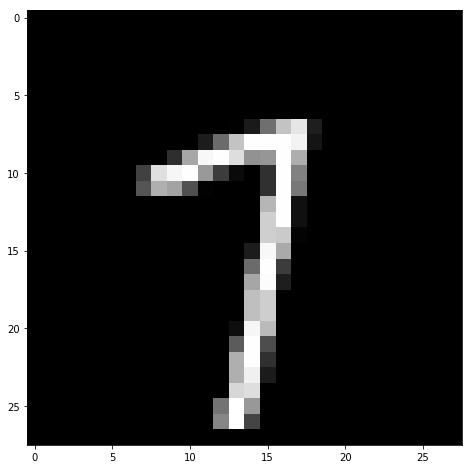

In [21]:
# show one of the images
plt.imshow(np.reshape(X_train[42,:], [28,28]))
print("Image Class: ", y_train[42])

## Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate. (This is already implemented, just run the cell!)

In [23]:
import time

input_size = 28 * 28 * 1
num_classes = 10
hidden_size = 20
net = TwoLayerNet(input_size, hidden_size, num_classes)

start_time = time.clock()

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=0.05, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

end_time = time.clock()
print("Training took ", end_time - start_time, " seconds")

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302593104823909
iteration 100 / 1000: loss 2.3025269722944883
iteration 200 / 1000: loss 2.2987297725397866
iteration 300 / 1000: loss 2.29524631455654
iteration 400 / 1000: loss 2.220992993771255
iteration 500 / 1000: loss 2.0599205639352167
iteration 600 / 1000: loss 1.8188571814447059
iteration 700 / 1000: loss 1.6450935564864797
iteration 800 / 1000: loss 1.60698434823319
iteration 900 / 1000: loss 1.5714705486341023
Training took  48.159949000000005  seconds
Validation accuracy:  0.7926


## Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.75 on the validation set. This isn't very good. In the next exercise we will look at ways to improve a network's performance.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some distinctive structure when visualized.

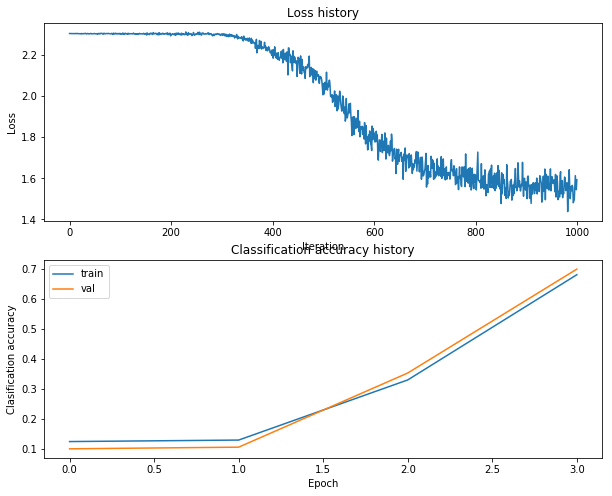

In [24]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

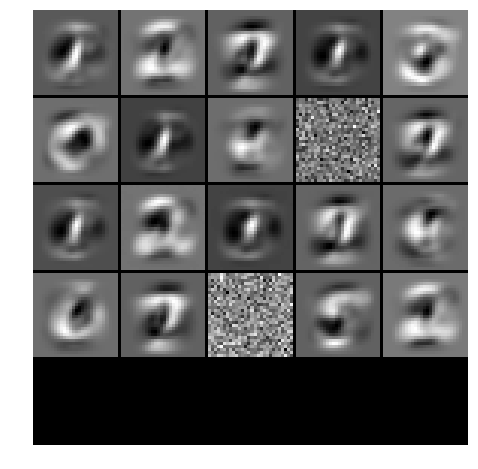

In [25]:
from cs231nHD.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(28, 28, 1, -1).transpose(3, 0, 1, 2)
    img = visualize_grid(W1, padding=1).astype('uint8')
    plt.imshow(img[:,:,0])
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)